# Underfitting and Overfitting demo using KNN

In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data_knn_classification_cleaned_titanic.csv')

In [4]:
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [5]:
x = data.drop(['Survived'], axis=1)
y = data['Survived']

In [6]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [7]:
#split the data
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=96, stratify=y)

# implementing KNN

In [8]:
#imporing KNN classifier and f1 score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [9]:
#creating an instance of KNN
clf = KNN(n_neighbors = 12)
clf.fit(train_x, train_y)

train_predict = clf.predict(train_x)
k1 = f1_score(train_predict, train_y)
print("training: ",k1)

test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y) 
print("testing: ",k)

training:  0.7194570135746606
testing:  0.6950354609929079


In [10]:
def f1score(k):
    train_f1 = []
    test_f1 = []
    
    for i in k:
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)

        train_predict = clf.predict(train_x)
        k1 = f1_score(train_predict, train_y)
        train_f1.append(k1)

        test_predict = clf.predict(test_x)
        k = f1_score(test_predict, test_y) 
        test_f1.append(k)
    return train_f1, test_f1
    

In [16]:
k = range(1,50)
train_f1, test_f1 = f1score(k)
train_f1, test_f1

([0.9606299212598425,
  0.7952941176470588,
  0.8185483870967741,
  0.7736263736263737,
  0.7934560327198364,
  0.7566371681415929,
  0.7698744769874477,
  0.7361419068736141,
  0.7685950413223139,
  0.7418655097613883,
  0.7587628865979381,
  0.7363834422657952,
  0.7557411273486431,
  0.7304347826086957,
  0.7366167023554603,
  0.7207207207207208,
  0.7205240174672489,
  0.7074829931972789,
  0.7186147186147185,
  0.7042889390519187,
  0.7198275862068966,
  0.7130044843049327,
  0.7189542483660131,
  0.7139689578713969,
  0.7261146496815286,
  0.7352297592997812,
  0.728448275862069,
  0.7331887201735359,
  0.7323340471092077,
  0.737527114967462,
  0.7296137339055794,
  0.7327586206896551,
  0.7366167023554603,
  0.7145969498910676,
  0.7194860813704497,
  0.6758620689655173,
  0.7043478260869565,
  0.6948775055679287,
  0.6945054945054945,
  0.6526806526806527,
  0.6621315192743764,
  0.6589327146171694,
  0.6605504587155964,
  0.647887323943662,
  0.6511627906976744,
  0.649164677

In [12]:
score = pd.DataFrame({'train score': train_f1, 'test_score':test_f1}, index = k)
score

,train score,test_score
2,0.804651,0.595745
3,0.820926,0.708075
4,0.773034,0.628571
5,0.771784,0.675497
6,0.746067,0.680851
...,...,...
115,0.562500,0.491525
116,0.560847,0.495726
117,0.560209,0.500000
118,0.561680,0.500000


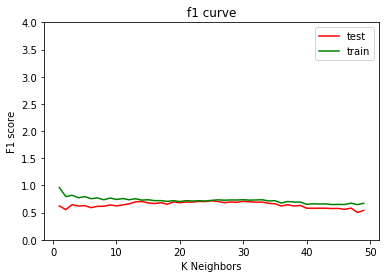

In [17]:
#visulaising 
plt.plot(k, test_f1, color ='red', label ='test')
plt.plot(k, train_f1, color ='green', label ='train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 score')
plt.title('f1 curve')
plt.ylim(0,4,1)
plt.legend()

In [20]:
#split the data
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=42, stratify=y)

In [21]:
k = range(1,50)
train_f1, test_f1 = f1score(k)

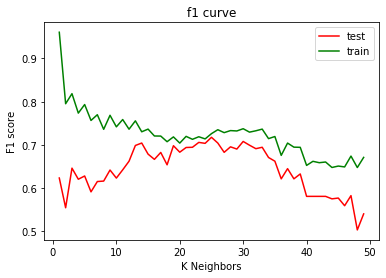

In [23]:
#visulaising 
plt.plot(k, test_f1, color ='red', label ='test')
plt.plot(k, train_f1, color ='green', label ='train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 score')
plt.title('f1 curve')
#plt.ylim(0,4,1)
plt.legend()

In [3]:
'''
here the value of k is decided by using both train and test data
, instead of (testset) that we can use validation set


types:

1. Hold-out validation
    as we directly divide the data into praprotions, there might be a 
    case where the validation  set is biased to only one class
    (which mean validation set might have data of only one class,
    these results in set have no idea about the other class)
    
    in this we have different distributions
    
2. Stratified hold out 
    
    in this we have equal distributions

in the hold out scenario we need good amount of data to maintain,
so we need to train with lot data. if the dataset is small?
and we want to bulid the complex relations out of them? 
'''

'\nhere the value of k is decided by using both train and test data\n, instead of (testset) that we can use validation set\n\n\ntypes:\n\n1. Hold-out validation\n    as we directly divide the data into praprotions, there might be a \n    case where the validation  set is biased to only one class\n    (which mean validation set might have data of only one class,\n    these results in set have no idea about the other class)\n    \n    in this we have different distributions\n    \n2. Stratified hold out \n    \n    in this we have equal distributions\n\nin the hold out scenario we need good amount of data to maintain,\nso we need to train with lot data. if the dataset is small?\nand we want to bulid the complex relations out of them? \n'

# Bias Variance Tradeoff

In [ ]:
'''
if variance is high then bias is low
if bias is high then variance is low 


error        high bias     high variance     optimally in btw

fit          underfit       overfit           bestfit
k range      21<k           k<11              12<k<21
complexity   low            high              optimum


Generalization error : defines the optimum model btw high bias and high varaince


High variance refers to overfitting whereas high bias 
refers to underfitting and we do not want both of these scenarios. 
So, the best model is said to have low bias and low variance.
'''